### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor 

**read dataset**

In [2]:
df = pd.read_csv('batiment.csv', sep=';')
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kWh)
0,1,NonResidential,Hotel,Mayflower park hotel,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,60.0,7.226362e+06,7.456910e+06,1.156514e+06
1,2,NonResidential,Hotel,Paramount Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,61.0,8.387933e+06,8.664479e+06,9.504252e+05
2,3,NonResidential,Hotel,5673-The Westin Seattle,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,43.0,7.258702e+07,7.393711e+07,1.451544e+07
3,5,NonResidential,Hotel,HOTEL MAX,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,56.0,6.794584e+06,6.946800e+06,8.115253e+05
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,75.0,1.417261e+07,1.465650e+07,1.573449e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,46.0,8.497457e+05,9.430032e+05,1.536550e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,NaN,9.502762e+05,1.053706e+06,1.162210e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,47.63644,-122.35784,1974,1.0,1,13157,0,13157,Other - Recreation,NaN,5.765898e+06,6.053764e+06,5.252517e+05
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,47.52832,-122.32431,1989,1.0,1,14101,0,14101,Other - Recreation,NaN,7.194712e+05,7.828413e+05,1.022480e+05


In [3]:
df.shape

(3376, 17)

### Data Cleaning

**Voir les valeurs manquantes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 17 columns):
OSEBuildingID             3376 non-null int64
BuildingType              3376 non-null object
PrimaryPropertyType       3376 non-null object
PropertyName              3376 non-null object
Latitude                  3376 non-null float64
Longitude                 3376 non-null float64
YearBuilt                 3376 non-null int64
NumberofBuildings         3368 non-null float64
NumberofFloors            3376 non-null int64
PropertyGFATotal          3376 non-null int64
PropertyGFAParking        3376 non-null int64
PropertyGFABuilding(s)    3376 non-null int64
LargestPropertyUseType    3356 non-null object
ENERGYSTARScore           2533 non-null float64
SiteEnergyUse(kBtu)       3371 non-null float64
SiteEnergyUseWN(kBtu)     3370 non-null float64
Electricity(kWh)          3367 non-null float64
dtypes: float64(7), int64(6), object(4)
memory usage: 448.5+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

ENERGYSTARScore           843
LargestPropertyUseType     20
Electricity(kWh)            9
NumberofBuildings           8
SiteEnergyUseWN(kBtu)       6
SiteEnergyUse(kBtu)         5
Longitude                   0
BuildingType                0
PrimaryPropertyType         0
PropertyName                0
Latitude                    0
NumberofFloors              0
YearBuilt                   0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
OSEBuildingID               0
dtype: int64

In [6]:
df.OSEBuildingID.value_counts().sort_values(ascending=False)

8        1
19792    1
20494    1
16       1
22547    1
        ..
22521    1
20474    1
24556    1
50023    1
24688    1
Name: OSEBuildingID, Length: 3376, dtype: int64

**La variable SiteEnergyUseWN est une donnee normalisé avec les condition climatique. Donc on le supprime puis qu'on ne va pas considerer la meteo dans notre model**

In [7]:
df.drop('SiteEnergyUseWN(kBtu)', axis=1, inplace=True)

**verifier les donnees dans l'ensemble**

In [8]:
df.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh)
count,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,2533.000000,3.371000e+03,3.367000e+03
mean,21208.991114,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,67.918674,5.403667e+06,1.086639e+06
std,12223.757015,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,26.873271,2.161063e+07,4.352478e+06
min,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,0.000000e+00,-3.382680e+04
25%,19990.750000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,53.000000,9.251286e+05,1.874229e+05
50%,23112.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,75.000000,1.803753e+06,3.451299e+05
75%,25994.250000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,90.000000,4.222455e+06,8.293178e+05
max,50226.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,8.739237e+08,1.925775e+08


In [9]:
df.describe(include='O')

,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType
count,3376,3376,3376,3356
unique,8,24,3362,56
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,Multifamily Housing
freq,1460,987,3,1667


In [10]:
(df['SiteEnergyUse(kBtu)'] == 0).sum()

18

****Pour la variable numerique SiteEnergyUse(kBtu)(a preddir), il n'ya que 5 lignes qui sont vide et 18 qui sont a 0 ce qui donne 23 sur 3376 donc on peut les supprimer**

In [11]:
df = df.dropna(subset=['SiteEnergyUse(kBtu)'])
df = df[df['SiteEnergyUse(kBtu)'] != 0]

#### Renseigner les valeurs manquantes

**separer les variables numeriques et les variables categorielles**

In [12]:
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:, i])
    else:
        num_data.append(df.iloc[:, i])
cat_data=pd.DataFrame(cat_data).transpose()
cat_data.describe(include='O')

,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType
count,3353,3353,3353,3338
unique,8,24,3339,55
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,Multifamily Housing
freq,1456,983,3,1666


In [13]:
num_data=pd.DataFrame(num_data).transpose()
num_data.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh)
count,3353.000000,3353.000000,3353.000000,3353.000000,3350.000000,3353.000000,3.353000e+03,3353.000000,3.353000e+03,2532.000000,3.353000e+03,3.349000e+03
mean,21277.945720,47.623913,-122.334796,1968.569937,1.107463,4.724426,9.465920e+04,8053.868476,8.660534e+04,67.906003,5.432676e+06,1.091461e+06
std,12185.440559,0.047676,0.027158,33.135785,2.114046,5.509088,2.183896e+05,32430.919059,2.073827e+05,26.871011,2.166494e+07,4.363624e+06
min,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,1.340900e+04,-3.382680e+04
25%,20021.000000,47.599850,-122.350560,1948.000000,1.000000,2.000000,2.845300e+04,0.000000,2.769000e+04,53.000000,9.353967e+05,1.883485e+05
50%,23130.000000,47.618610,-122.332490,1975.000000,1.000000,4.000000,4.409800e+04,0.000000,4.316200e+04,75.000000,1.813404e+06,3.461471e+05
75%,26002.000000,47.657010,-122.319500,1997.000000,1.000000,5.000000,9.109100e+04,0.000000,8.438500e+04,90.000000,4.233753e+06,8.331035e+05
max,50226.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,8.739237e+08,1.925775e+08


**Pour la variable categorielle LargestPropertyUseType, on utilisera la valeur la plus frequente: ie "Multifamily Housing"**

In [14]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

**Pour le reste des variables numeriques on utilisera la moyenne au niveau des valeurs manquantes**

In [15]:
num_data = num_data.fillna(num_data.mean())
num_data.isnull().sum().sort_values(ascending=False)

Electricity(kWh)          0
SiteEnergyUse(kBtu)       0
ENERGYSTARScore           0
PropertyGFABuilding(s)    0
PropertyGFAParking        0
PropertyGFATotal          0
NumberofFloors            0
NumberofBuildings         0
YearBuilt                 0
Longitude                 0
Latitude                  0
OSEBuildingID             0
dtype: int64

**Suppression de l'identifiant unique OSEBuildingID**

In [16]:
# num_data.drop('OSEBuildingID', axis=1, inplace=True)

**Isoler la variable cible**

In [17]:
target = num_data['SiteEnergyUse(kBtu)']
num_data.drop('SiteEnergyUse(kBtu)', axis=1, inplace=True)

**Replace target values by their log**

In [18]:
target = np.log(target)

**Creation de la base de donnees netoyee**

In [19]:
clean_df = pd.concat([cat_data, num_data, target], axis=1)

### Analyse exploratoire

**Commencons avec notre variable cible**

In [20]:
target.sort_values(ascending=False)

3274    20.588504
35      19.921163
170     19.495993
618     19.490943
558     19.431125
          ...    
1577    10.953141
1295    10.698593
1229    10.090195
2189     9.729664
3341     9.503681
Name: SiteEnergyUse(kBtu), Length: 3353, dtype: float64

In [21]:
target.describe()

count    3353.000000
mean       14.583875
std         1.159737
min         9.503681
25%        13.748726
50%        14.410716
75%        15.258599
max        20.588504
Name: SiteEnergyUse(kBtu), dtype: float64

**Polygone des frequences**

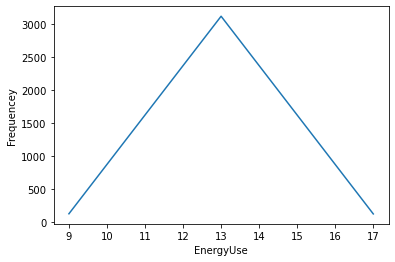

In [22]:
counts, bins = np.histogram(target, bins=range(int(target.min()),int(target.max()) + 3,4))
plt.plot(bins[:-1], counts)
plt.ylabel('Frequencey')
plt.xlabel('EnergyUse');

**Histogram des frequences**

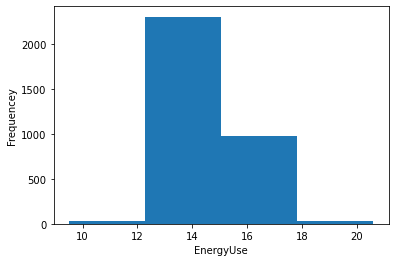

In [23]:
plt.hist(target, density=False, bins=4)  # density=False would make counts
plt.ylabel('Frequencey')
plt.xlabel('EnergyUse');

In [24]:
cat_data['BuildingType'].value_counts()

NonResidential          1456
Multifamily LR (1-4)    1013
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
Nonresidential COS        85
SPS-District K-12         84
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

/Users/edacy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency By Building Type')

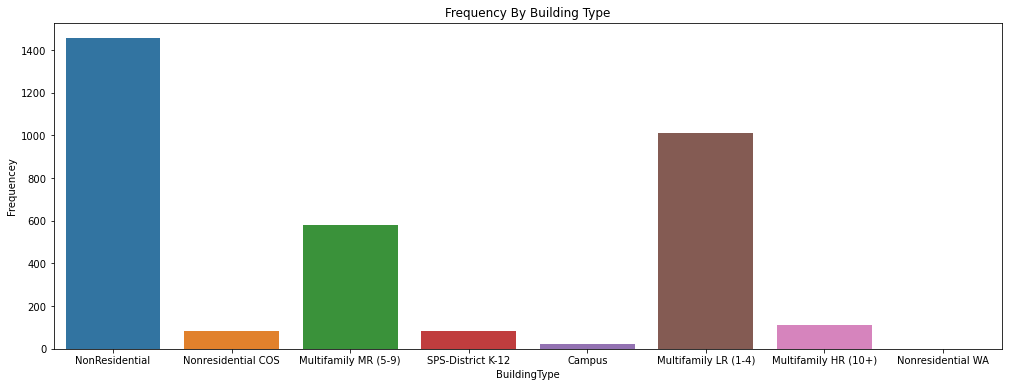

In [25]:
plt.figure(figsize=(17,6))
sns.countplot(cat_data['BuildingType'])
plt.ylabel('Frequencey')
plt.xlabel('BuildingType');
plt.title('Frequency By Building Type')

In [26]:
btypes = cat_data['BuildingType'].value_counts().to_dict()
btypes_key = []
btypes_value = []
for key in btypes:
    btypes_key.append(key)
    btypes_value.append(btypes[key])

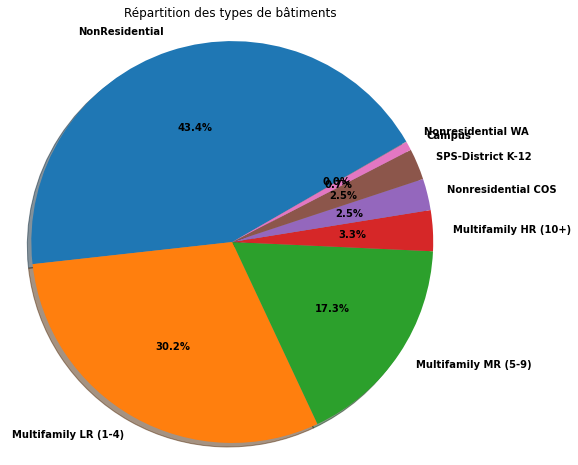

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(btypes_value, labels=btypes_key, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=10, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments")
plt.show()

La majeure partie des batiments sont non residentielles. Portons une etudes sur ces derniers

In [28]:
propertyTypes = cat_data.loc[(cat_data['BuildingType']=="NonResidential"),'PrimaryPropertyType']
propertyTypes.value_counts()

Small- and Mid-Sized Office    287
Other                          183
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

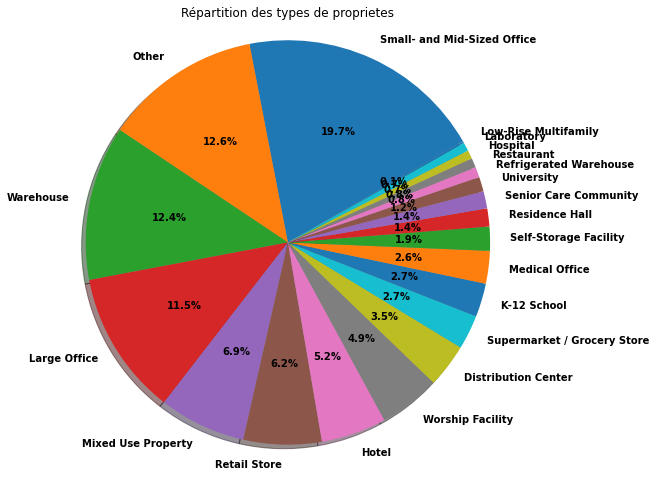

In [29]:
btypes = propertyTypes.value_counts().to_dict()
btypes_key = []
btypes_value = []
for key in btypes:
    btypes_key.append(key)
    btypes_value.append(btypes[key])
    
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(btypes_value, labels=btypes_key, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=10, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de proprietes")
plt.show()

**Repartition selon l'annee de construction**

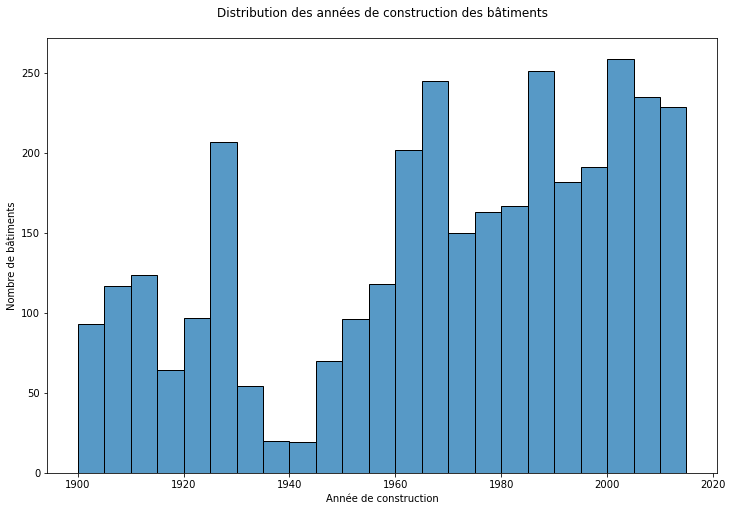

In [30]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=num_data, x='YearBuilt', bins=int((num_data.YearBuilt.max() - num_data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

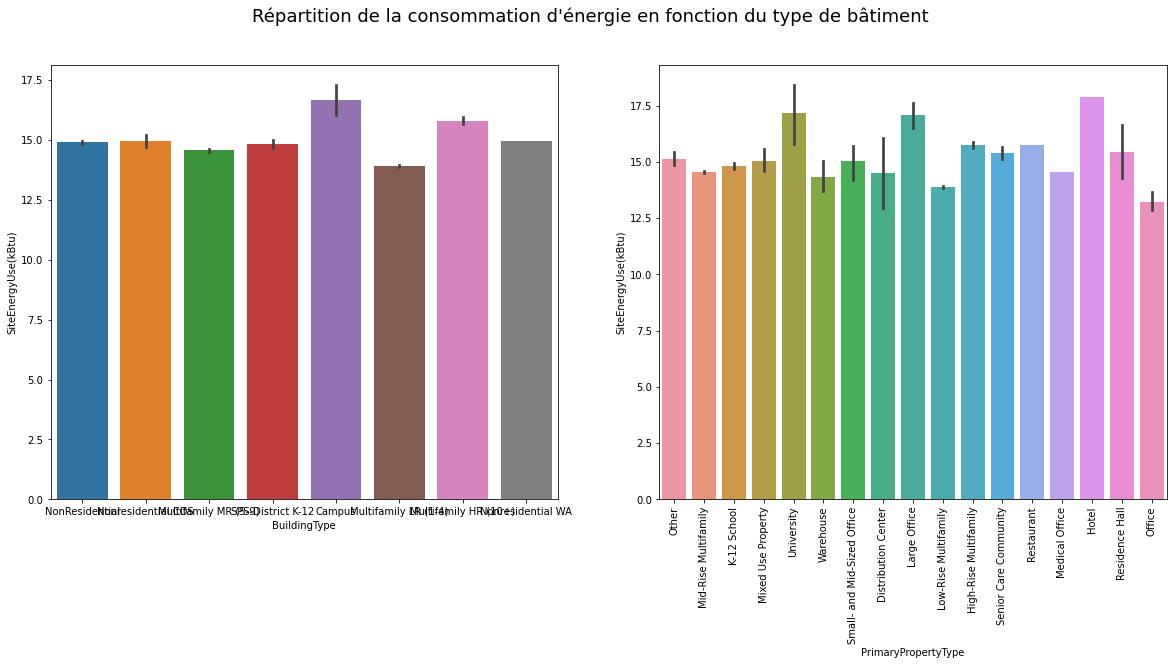

In [31]:
non_residential = clean_df[clean_df["BuildingType"] != "NonResidential"]
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=clean_df, ax=axes[0])
sns.barplot(x='PrimaryPropertyType',y='SiteEnergyUse(kBtu)',data=non_residential, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie en fonction du type de bâtiment", fontsize=18)
plt.show()

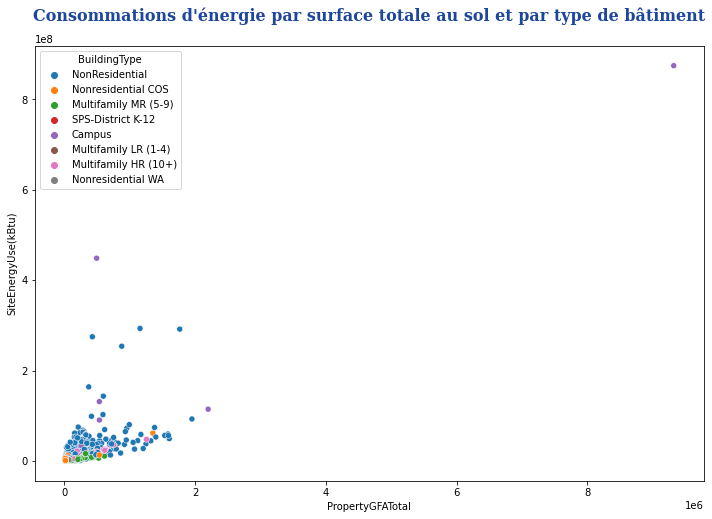

In [32]:


font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()



**Regardons cette figure avec une dispersion plus large en appliquant la fonction log sur les valeurs numériques**

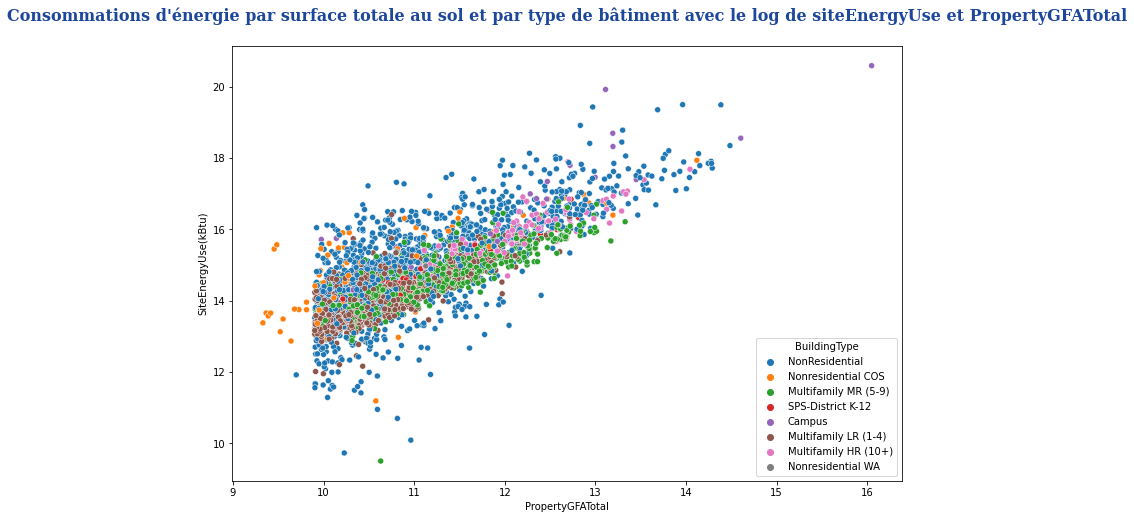

In [33]:
data = clean_df
data['PropertyGFATotal'] = np.log(data['PropertyGFATotal'])

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment avec le log de siteEnergyUse et PropertyGFATotal\n", 
          fontdict=font_title, fontsize=16)
plt.show()

Ce graphe montre que pour chaque type de proprietes, plus sa taille est grande plus elle consomme de l'energie. On remarque aussi un outlier sur les proprietes de type campus avec une taille plus grande que les autres. Cette valeur est atypique et ne constitue pas donc une erreur.

### Realisons un ACP

In [34]:
num_data.shape

(3353, 11)

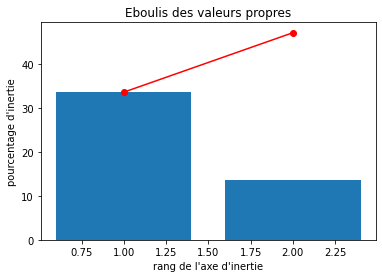

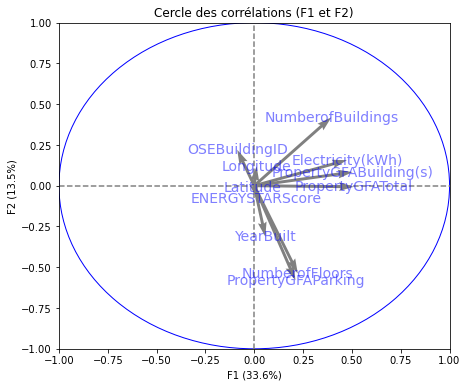

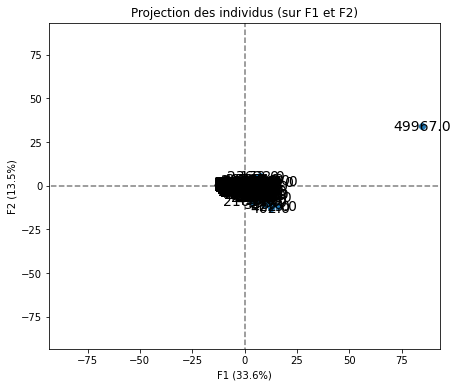

In [35]:
data_pca = num_data.copy()
# choix du nombre de composantes à calculer
n_comp = len(data_pca.columns)

# préparation des données pour l'ACP
X = data_pca.values
names = data_pca["OSEBuildingID"]
features = data_pca.columns
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
# Calcul des composantes principales
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
# Eboulis des valeurs propres
display_scree_plot(pca)
principalComponents = pca.fit_transform(X_scaled)
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.show()

Sur l'axe F1, on voit que les variables NumberOfBuildings, Electricity, PropertyGFABuildding(s) et PopertyGFATotal sont corrélés positivement. Donc on peut interprété F1 comme la taille du propriété. En effet plus il y'a de batiments dans la propriété plus la sa taille est grande et plus elle peut consommer de l'electricité. Et évidemment plus la surface des propriétés est grande plus sa taille est grande(PropertyGFABuildding(s) et PopertyGFATotal).
Donc on peut remplacer ces variables par une nouvelle variable F1 = Property_Size_F qui les synthétise.

Par ailleurs sur l'axe F2, on voit que NumberofFloors qui est le nombre d'etages et PropertyGFAParking qui est la surface des parking sont corrélés négativement à l'axe. On peut considerer F2 comme un indicateur sur le type d'utilisation. En effet, une maison et un hotel n'ont pas le meme nombre d'etage de meme pour le nombre de parking ou la taille de parking.
Donc on peut remplacer ces deux variables par une nouvelle variable F2 = UsageType_F

In [36]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Property_Size_F', 'UsageType_F'])


**Create new Df with the new feature**

In [37]:
df = clean_df.copy()
df.drop(['NumberofBuildings', 'Electricity(kWh)', 
                'PropertyGFABuilding(s)', 'PropertyGFATotal', 'NumberofFloors', 'PropertyGFAParking'], axis=1, inplace=True)
df = pd.concat([principalDf, df], axis=1)
df = df.dropna(subset=['SiteEnergyUse(kBtu)'])
df = df[df['SiteEnergyUse(kBtu)'] != 0]
# le = LabelEncoder()
# for i in cat_data:
#     cat_data[i] = le.fit_transform(cat_data[i])
# cat_data
df = df.apply(LabelEncoder().fit_transform)

In [38]:
print(df.shape)
df.head()

(3353, 12)


,Property_Size_F,UsageType_F,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType,OSEBuildingID,Latitude,Longitude,YearBuilt,ENERGYSTARScore,SiteEnergyUse(kBtu)
0,2762,432,4,3,1878,12,0,1105,1094,27,59,2842
1,2867,207,4,3,2205,12,1,1150,1255,93,60,2922
2,3311,11,4,3,336,12,2,1190,1087,66,42,3335
3,2560,618,4,3,1368,12,3,1198,1138,26,55,2812
4,3085,79,4,3,3164,12,4,1180,1022,77,75,3118


#### Les correlations linéaires

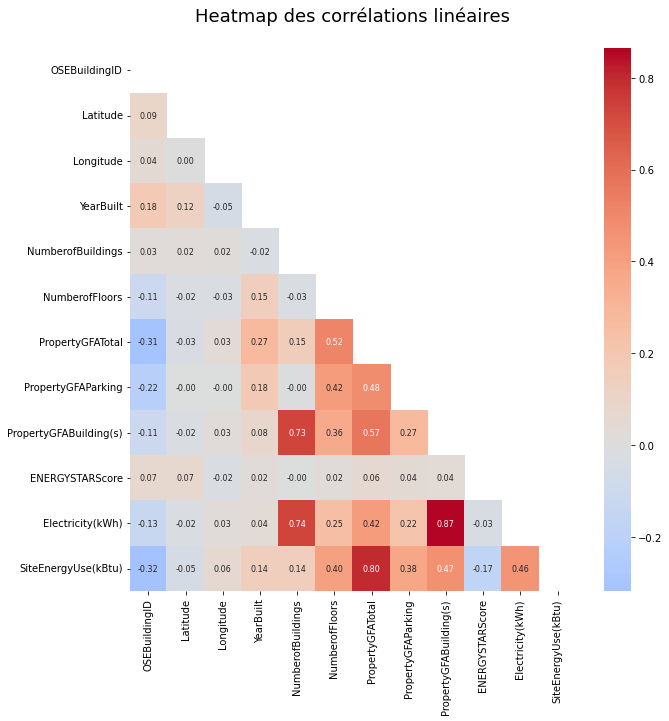

In [39]:
corr = clean_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

### Preparation du model

Diviser les donnees en donnees de test et d'entrainement

In [40]:
num_data.reset_index()
cat_data.reset_index()
x = df#pd.concat([cat_data, num_data], axis=1)
y = target

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2514, 12)
(2514,)
(839, 12)
(839,)


### Linear Regression

In [42]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
pd.DataFrame(y_pred, columns=['y_pred'])
    

,y_pred
0,15.965005
1,16.150418
2,13.438401
3,13.470610
4,15.229721
...,...
834,13.409567
835,12.934846
836,14.810680
837,16.092294


### Verification des algorithmes

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Taux d'erreurs MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("Taux d'erreurs RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
r2score = r2_score(y_test, y_pred)
print("Précision du model: {}%".format(round(r2score * 100, 2)))

Taux d'erreurs MAE: 0.23622660946027133
Taux d'erreurs RMSE: 0.37515521297975035
Précision du model: 89.99%


In [44]:
y_test

2253    15.915173
3173    16.268630
717     13.561558
1859    13.583502
2212    14.923369
          ...    
3348    13.617328
960     13.099126
794     14.684875
336     15.876194
1117    14.353787
Name: SiteEnergyUse(kBtu), Length: 839, dtype: float64

### Ridge Regression

In [45]:
rr = Ridge(alpha=1)
rr.fit(x_train, y_train)
ry_pred = rr.predict(x_test)
w = rr.coef_
print("Taux d'erreurs MAE: {}".format(mean_absolute_error(y_test, ry_pred)))
print("Taux d'erreurs RMSE: {}".format(np.sqrt(mean_squared_error(y_test, ry_pred))))
r2score = r2_score(y_test, ry_pred)
print("Précision du model: {}%".format(round(r2score * 100, 2)))

Taux d'erreurs MAE: 0.2362262861656979
Taux d'erreurs RMSE: 0.3751557719032409
Précision du model: 89.99%


### Decision Tree Regressor

In [46]:
dtr = DecisionTreeRegressor(random_state = 0) 
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
print("Taux d'erreurs MAE: {}".format(mean_absolute_error(y_test, dtr_pred)))
print("Taux d'erreurs RMSE: {}".format(np.sqrt(mean_squared_error(y_test, dtr_pred))))
r2score = r2_score(y_test, dtr_pred)
print("Précision du model: {}%".format(round(r2score * 100, 2)))

Taux d'erreurs MAE: 0.00687609636372144
Taux d'erreurs RMSE: 0.03305462005440885
Précision du model: 99.92%


In [47]:
y_test

2253    15.915173
3173    16.268630
717     13.561558
1859    13.583502
2212    14.923369
          ...    
3348    13.617328
960     13.099126
794     14.684875
336     15.876194
1117    14.353787
Name: SiteEnergyUse(kBtu), Length: 839, dtype: float64

In [48]:
pd.DataFrame(dtr_pred)

,0
0,15.915349
1,16.259743
2,13.560628
3,13.583244
4,14.926039
...,...
834,13.615843
835,13.101256
836,14.679065
837,15.877039


Le taux d'erreur ainsi que la precision des Algorithmes Ridge Regression et LinearRegression sont quasi egaux avec une precision de 89.99%
Par ailleurs L'Qlgorithme Decision Tree Regressor est plus efficace avec une precision plus élevée de 99.92%

### Conclusion

L'agorithme retenu est le Decision Tree Regressor

### Enregistrer le model Decision Tree Regressor pour le deploiement

In [55]:
decisionTreeRegressor = DecisionTreeRegressor() 
decisionTreeRegressor.fit(x_train, y_train)
pickle.dump(decisionTreeRegressor, open('model.pkl', 'wb'))

In [56]:
x_test.head(2).to_dict(orient='records')

[{'Property_Size_F': 2328,
  'UsageType_F': 491,
  'BuildingType': 4,
  'PrimaryPropertyType': 12,
  'PropertyName': 1038,
  'LargestPropertyUseType': 28,
  'OSEBuildingID': 2232,
  'Latitude': 721,
  'Longitude': 2010,
  'YearBuilt': 88,
  'ENERGYSTARScore': 67,
  'SiteEnergyUse(kBtu)': 2907},
 {'Property_Size_F': 2511,
  'UsageType_F': 948,
  'BuildingType': 4,
  'PrimaryPropertyType': 6,
  'PropertyName': 1454,
  'LargestPropertyUseType': 23,
  'OSEBuildingID': 3150,
  'Latitude': 608,
  'Longitude': 1218,
  'YearBuilt': 109,
  'ENERGYSTARScore': 62,
  'SiteEnergyUse(kBtu)': 3056}]